In [1]:
import numpy as np

from linear_regression import LinearRegression as MyLinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from metrics import mse, mae
from metrics import r2_score as r2_score1
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
RANDOM_STATE = 42

Сгенерируем данные для регрессии:

In [3]:
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples, n_features=1,
    n_informative=1, noise=10,
    coef=True, random_state=RANDOM_STATE
)

# Add outlier data
np.random.seed(RANDOM_STATE)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Разобьем данные на тренировочную и обучающую выборки:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

Посмотрим на данные:

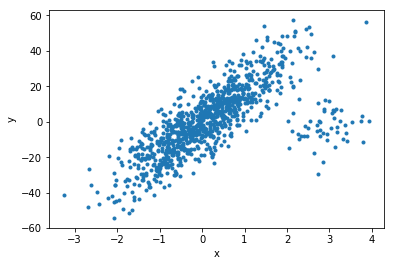

In [5]:
plt.plot(X, y, ".");
plt.xlabel("x");
plt.ylabel("y");

Обучим линейную модель и обучим ее на тренировочных данных:Ъ

In [6]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Сделаем предикт на тестовых данных:

In [7]:
y_hat = linear_regression_model.predict(X_test)

Посмотрим на значения метрик:

In [8]:
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

MAE: 9.940362029807723
MSE: 173.1929838913916
R^2 score: 0.47263462857304817


Посмотрим на веса обученной модели:

In [9]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[11.3272569]
-1.3555932515073648


Визуализируем:

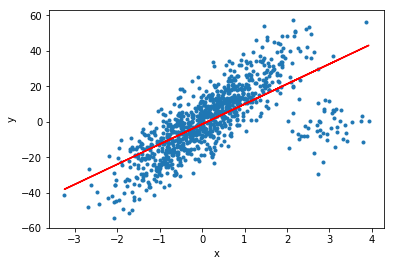

In [10]:
plt.plot(X, y, ".");
plt.plot(X, X * linear_regression_model.coef_ + linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

---

In [11]:
# TODO: выполните то же самое с написанной вами моделью:
# 1. обучите ее на (X_train, y_train)
#   * попробуйте обучать с регуляризацией и без
#   * пробуйте различные гиперпараметры (шаг градиента, коэффицент регуляризации)
# 2. оцените кач-во на X_test, используя все написанные вами метрики
# 3. сравните значения метрик с значениями метрик из sklearn.metrics
# 4. визуализируйте y = k * x + b, где k и b -- bias и вес вашей модели

In [12]:
my_linear_regression_model = MyLinearRegression(0.5)
my_linear_regression_model.fit(X_train, y_train)

Done


1) Те же шаги, что и выше

In [13]:
y_hat = my_linear_regression_model.predict(X_test)
print("My: ")
print("MAE:", mae(y_test, y_hat))
print("MSE:", mse(y_test, y_hat))
print("R^2 score:", r2_score1(y_test, y_hat))
print("\nFrom sklearn: ")
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

My: 
MAE: 9.940425080683239
MSE: 173.1925797695816
R^2 score: 0.4726358591070089

From sklearn: 
MAE: 9.940425080683239
MSE: 173.1925797695816
R^2 score: 0.4726358591070089


In [14]:
print(my_linear_regression_model.coef_)
print(my_linear_regression_model.intercept_)

[11.32698062]
-1.3557097548258015


In [15]:
my_linear_regression_model.get_weights()

array([-1.35570975, 11.32698062])

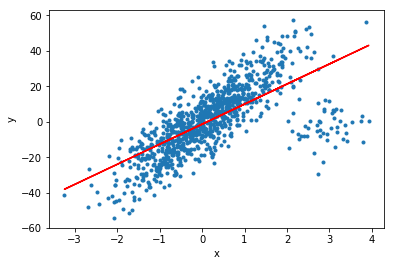

In [16]:
plt.plot(X, y, ".");
plt.plot(X, X * my_linear_regression_model.coef_ + my_linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

2) обучение с регуляризацией L1

In [17]:
my_linear_regression_model = MyLinearRegression(lambda_coef=0.1, regulatization='L1')
my_linear_regression_model.fit(X_train, y_train)

Done


In [18]:
y_hat = my_linear_regression_model.predict(X_test)
print("My: ")
print("MAE:", mae(y_test, y_hat))
print("MSE:", mse(y_test, y_hat))
print("R^2 score:", r2_score1(y_test, y_hat))
print("\nFrom sklearn: ")
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

My: 
MAE: 9.940412676961415
MSE: 173.1929381450182
R^2 score: 0.4726347678688365

From sklearn: 
MAE: 9.940412676961415
MSE: 173.1929381450182
R^2 score: 0.4726347678688365


In [19]:
print(my_linear_regression_model.coef_)
print(my_linear_regression_model.intercept_)

[11.32553143]
-1.3522768607955231


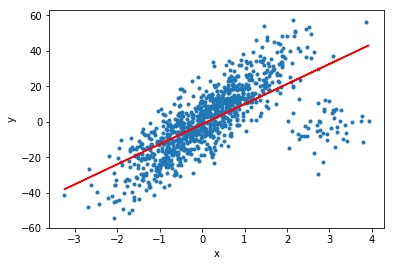

In [20]:
plt.plot(X, y, ".");
plt.plot(X, X * my_linear_regression_model.coef_ + my_linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

3) обучение с регуляризацией L2

In [21]:
my_linear_regression_model = MyLinearRegression(lambda_coef=0.1, regulatization='L2')
my_linear_regression_model.fit(X_train, y_train)

Done


In [22]:
y_hat = my_linear_regression_model.predict(X_test)
print("My: ")
print("MAE:", mae(y_test, y_hat))
print("MSE:", mse(y_test, y_hat))
print("R^2 score:", r2_score1(y_test, y_hat))
print("\nFrom sklearn: ")
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

My: 
MAE: 9.94137781412368
MSE: 173.18709206752118
R^2 score: 0.47265256892960306

From sklearn: 
MAE: 9.94137781412368
MSE: 173.18709206752118
R^2 score: 0.47265256892960306


In [23]:
print(my_linear_regression_model.coef_)
print(my_linear_regression_model.intercept_)

[11.31979409]
-1.3506396073157954


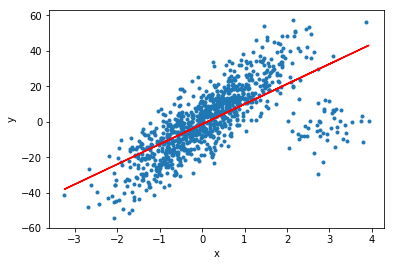

In [24]:
plt.plot(X, y, ".");
plt.plot(X, X * my_linear_regression_model.coef_ + my_linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

4) меняем lr

In [25]:
my_linear_regression_model = MyLinearRegression(lambda_coef=0.8, regulatization='L2')
my_linear_regression_model.fit(X_train, y_train)

Done


In [26]:
y_hat = my_linear_regression_model.predict(X_test)
print("My: ")
print("MAE:", mae(y_test, y_hat))
print("MSE:", mse(y_test, y_hat))
print("R^2 score:", r2_score1(y_test, y_hat))
print("\nFrom sklearn: ")
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

My: 
MAE: 276242222320.3972
MSE: 1.3623743625619343e+23
R^2 score: -4.148372789659766e+20

From sklearn: 
MAE: 276242222320.3972
MSE: 1.3623743625619343e+23
R^2 score: -4.148372789659766e+20


In [27]:
print(my_linear_regression_model.coef_)
print(my_linear_regression_model.intercept_)

[-2.90690245e+11]
-122764476994.16946


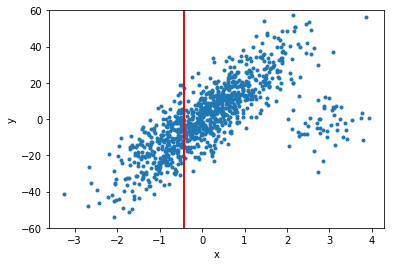

In [28]:
plt.plot(X, y, ".");
plt.plot(X, X * my_linear_regression_model.coef_ + my_linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylim((-4,4));
plt.ylabel("y");
plt.ylim((-60,60));


5) и еще один тест

In [29]:
my_linear_regression_model = MyLinearRegression(lambda_coef=0.0001)
my_linear_regression_model.fit(X_train, y_train)

Done


In [30]:
y_hat = my_linear_regression_model.predict(X_test)
print("My: ")
print("MAE:", mae(y_test, y_hat))
print("MSE:", mse(y_test, y_hat))
print("R^2 score:", r2_score1(y_test, y_hat))
print("\nFrom sklearn: ")
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

My: 
MAE: 14.308637453916997
MSE: 320.148798358488
R^2 score: 0.0251603375336954

From sklearn: 
MAE: 14.308637453916997
MSE: 320.148798358488
R^2 score: 0.0251603375336954


In [31]:
print(my_linear_regression_model.coef_)
print(my_linear_regression_model.intercept_)

[0.2959418]
0.01263091623904093


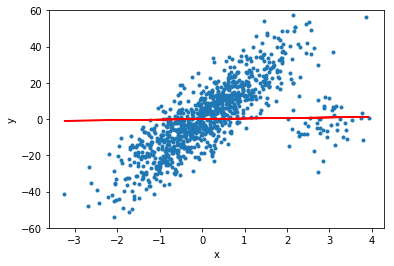

In [32]:
plt.plot(X, y, ".");
plt.plot(X, X * my_linear_regression_model.coef_ + my_linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylim((-4,4));
plt.ylabel("y");
plt.ylim((-60,60));

Выводы:
Результаты работы MyLinearRegression похожи на результаты работы LinearRegression из sklearn. Более того, реализованные функции mse, mae и r2_score так же работают схожим образом, что и их аналоги в sklearn!